In [ ]:
!pip install yfinance

In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta

# Sets style for improved plot visuals
plt.style.use('seaborn-v0_8-darkgrid')

print("All Libraries loaded successfully!")
print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d')}")

All Libraries loaded successfully!
Analysis Date: 2025-12-10


In [11]:
# Define stock tickers
tech_stocks = ['AAPL', 'MSFT', 'GOOGL', 'NVDA', 'META']
banking_stocks = ['JPM', 'BAC', 'WFC', 'C', 'GS']

all_stocks = tech_stocks + banking_stocks

# Set date range (10 years)
end_date = datetime.now()
start_date = end_date - timedelta(days=365*10)

print(f"Downloading data for {len(all_stocks)} stocks...")
print(f"Date range: {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")
print(f"\nTech stocks: {', '.join(tech_stocks)}")
print(f"Banking stocks: {', '.join(banking_stocks)}")

# Download stock data
data = yf.download(all_stocks, start=start_date, end=end_date)

# Extract Close prices (these are already adjusted in yfinance)
stock_data = data['Close']

print(f"\nDownloaded {len(stock_data)} days of data!")
print(f"\nFirst few rows of data:")
print(stock_data.head())
print(f"\nData shape: {stock_data.shape[0]} days × {stock_data.shape[1]} stocks")
print(f"\nColumn names: {list(stock_data.columns)}")

Date range: 2015-12-13 to 2025-12-10

Tech stocks: AAPL, MSFT, GOOGL, NVDA, META
Banking stocks: JPM, BAC, WFC, C, GS


/var/folders/cc/29jyf78n0_9gnj6pl_72l7bc0000gn/T/ipykernel_42076/750057625.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(all_stocks, start=start_date, end=end_date)
[*********************100%***********************]  10 of 10 completed


Downloaded 2513 days of data!

First few rows of data:
Ticker           AAPL        BAC          C      GOOGL          GS        JPM  \
Date                                                                            
2015-12-14  25.360750  13.493653  38.170647  37.841084  143.759598  49.038593   
2015-12-15  24.912060  13.991633  39.231361  37.719501  148.331543  50.434891   
2015-12-16  25.103710  14.256687  40.262196  38.538311  151.754379  51.526009   
2015-12-17  24.571611  13.895251  39.470402  38.202850  148.820587  50.572239   
2015-12-18  23.906475  13.461526  38.252815  37.558716  143.018005  49.137798   

Ticker            META       MSFT      NVDA        WFC  
Date                                                    
2015-12-14  104.018761  48.281181  0.794466  40.114544  
2015-12-15  103.909439  48.333694  0.804223  41.403927  
2015-12-16  106.135712  49.148018  0.809102  42.112713  
2015-12-17  105.569199  48.771507  0.796906  41.826187  
2015-12-18  103.402565  47.396805 

In [12]:
# Calculate daily returns (percent change from previous day)
daily_returns = stock_data.pct_change()

# Drop the first row (it's NaN because there's no previous day)
daily_returns = daily_returns.dropna()

print("Daily Returns Calculated!")
print(f"\nFirst few days of returns:")
print(daily_returns.head())
print(f"\nExample: If AAPL shows 0.02, that means it went UP 2% that day")
print(f"         If AAPL shows -0.01, that means it went DOWN 1% that day")

Daily Returns Calculated!

First few days of returns:
Ticker          AAPL       BAC         C     GOOGL        GS       JPM  \
Date                                                                     
2015-12-15 -0.017692  0.036905  0.027789 -0.003213  0.031803  0.028473   
2015-12-16  0.007693  0.018944  0.026276  0.021708  0.023076  0.021634   
2015-12-17 -0.021196 -0.025352 -0.019666 -0.008705 -0.019333 -0.018510   
2015-12-18 -0.027069 -0.031214 -0.030848 -0.016861 -0.038990 -0.028364   
2015-12-21  0.012261  0.012530  0.011326  0.005219  0.012878  0.017702   

Ticker          META      MSFT      NVDA       WFC  
Date                                                
2015-12-15 -0.001051  0.001088  0.012281  0.032143  
2015-12-16  0.021425  0.016848  0.006067  0.017119  
2015-12-17 -0.005338 -0.007661 -0.015074 -0.006804  
2015-12-18 -0.020523 -0.028187 -0.016223 -0.030287  
2015-12-21  0.007016  0.012932  0.023646  0.004276  

Example: If AAPL shows 0.02, that means it went UP 2% t

In [14]:
# Calculate key metrics for each stock

# Annualized return (average daily return × 252 trading days)
annual_returns = daily_returns.mean() * 252

# Annualized volatility (standard deviation × sqrt(252))
annual_volatility = daily_returns.std() * np.sqrt(252)

# Create summary DataFrame
summary = pd.DataFrame({
    'Annual Return': annual_returns,
    'Annual Volatility': annual_volatility,
    'Return/Risk Ratio': annual_returns / annual_volatility
})

# Add sector column
summary['Sector'] = ['Tech' if ticker in tech_stocks else 'Banking' 
                     for ticker in summary.index]

# Sort by annual return
summary = summary.sort_values('Annual Return', ascending=False)

print("STOCK PERFORMANCE SUMMARY (10 Years)")
print("="*70)
print(summary)
print("\nReturn/Risk Ratio: Higher is better (more return per unit of risk)")

STOCK PERFORMANCE SUMMARY (10 Years)
        Annual Return  Annual Volatility  Return/Risk Ratio   Sector
Ticker                                                              
NVDA         0.669901           0.498635           1.343470     Tech
AAPL         0.282861           0.290984           0.972085     Tech
MSFT         0.266053           0.267865           0.993235     Tech
META         0.258872           0.385332           0.671816     Tech
GOOGL        0.255901           0.288348           0.887474     Tech
GS           0.226848           0.296857           0.764168  Banking
JPM          0.223156           0.276304           0.807647  Banking
BAC          0.188121           0.312697           0.601606  Banking
C            0.163209           0.334186           0.488378  Banking
WFC          0.133544           0.321469           0.415417  Banking

Return/Risk Ratio: Higher is better (more return per unit of risk)


Visualizations created and saved as 'stock_analysis.png'!


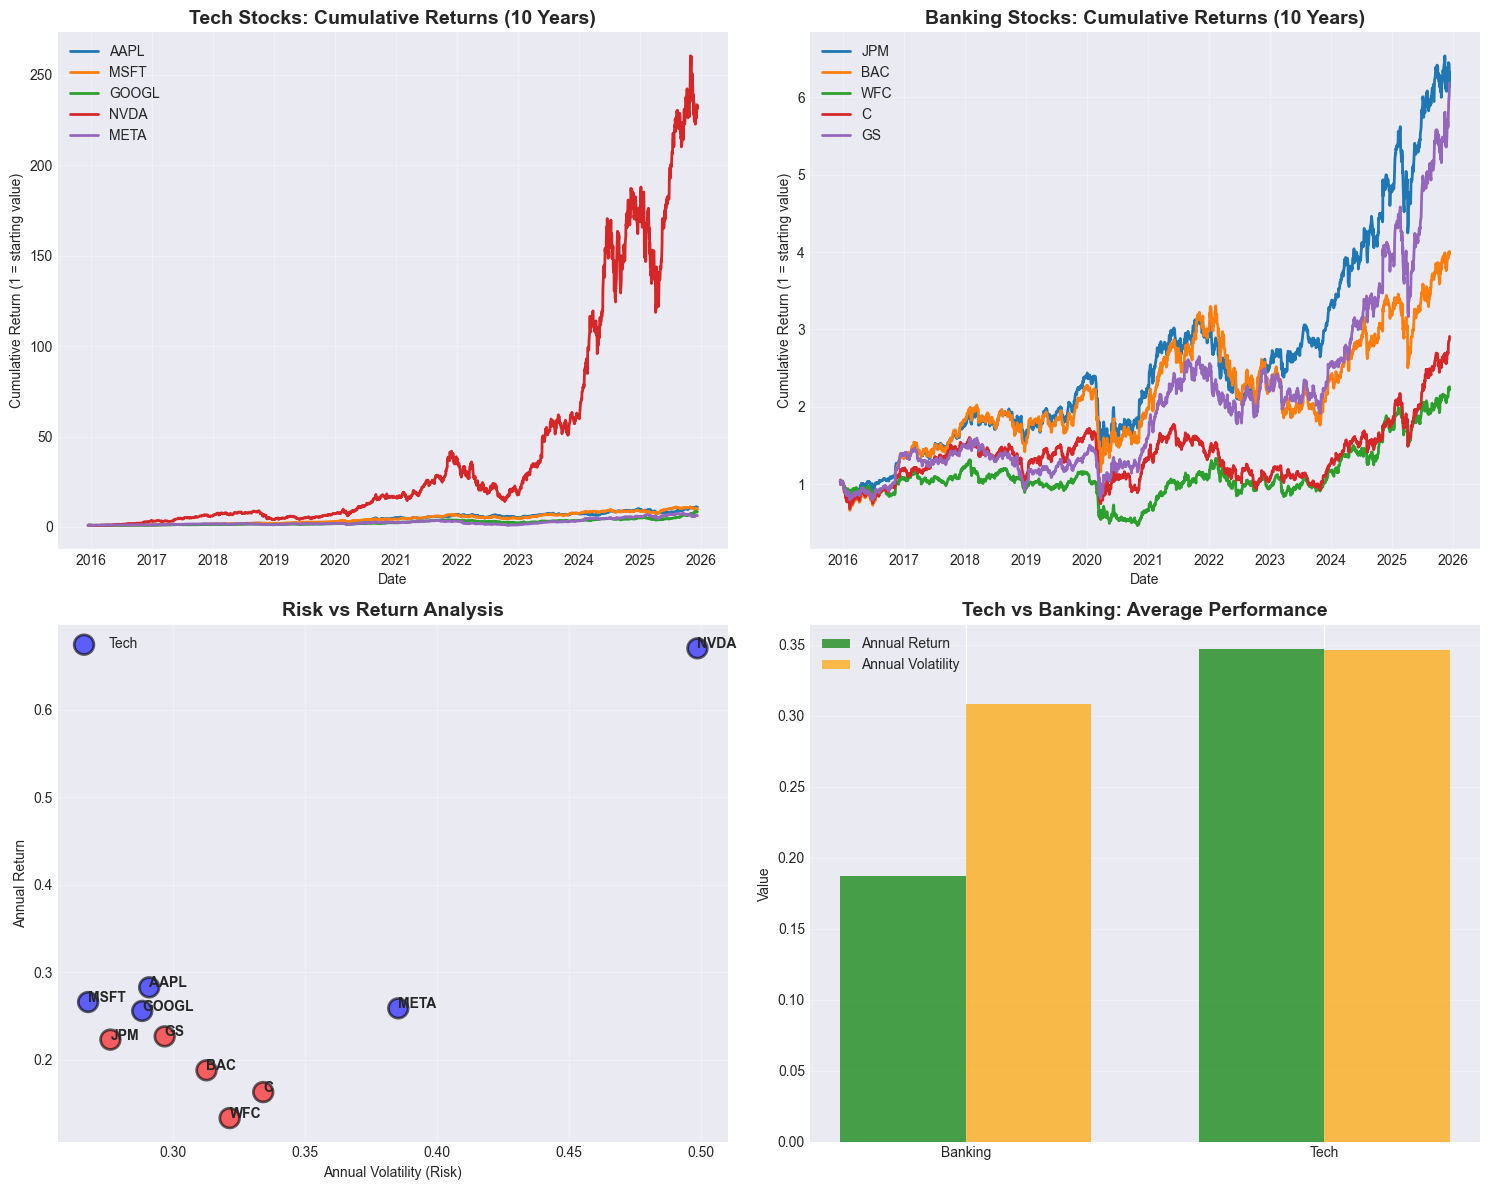

In [15]:
# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Cumulative Returns Over Time
cumulative_returns = (1 + daily_returns).cumprod()

# Plot tech stocks
for stock in tech_stocks:
    axes[0, 0].plot(cumulative_returns.index, cumulative_returns[stock], 
                    label=stock, linewidth=2)

axes[0, 0].set_title('Tech Stocks: Cumulative Returns (10 Years)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Cumulative Return (1 = starting value)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Banking Stocks Cumulative Returns
for stock in banking_stocks:
    axes[0, 1].plot(cumulative_returns.index, cumulative_returns[stock], 
                    label=stock, linewidth=2)

axes[0, 1].set_title('Banking Stocks: Cumulative Returns (10 Years)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Cumulative Return (1 = starting value)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Return vs Risk Scatter Plot
colors = ['blue' if sector == 'Tech' else 'red' for sector in summary['Sector']]
axes[1, 0].scatter(summary['Annual Volatility'], summary['Annual Return'], 
                   c=colors, s=200, alpha=0.6, edgecolors='black', linewidth=2)

# Add labels for each point
for idx, row in summary.iterrows():
    axes[1, 0].annotate(idx, (row['Annual Volatility'], row['Annual Return']),
                       fontsize=10, fontweight='bold')

axes[1, 0].set_title('Risk vs Return Analysis', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Annual Volatility (Risk)')
axes[1, 0].set_ylabel('Annual Return')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend(['Tech', 'Banking'], loc='upper left')

# Plot 4: Sector Comparison (Bar Chart)
sector_avg = summary.groupby('Sector')[['Annual Return', 'Annual Volatility']].mean()
x = range(len(sector_avg))
width = 0.35

axes[1, 1].bar([i - width/2 for i in x], sector_avg['Annual Return'], 
               width, label='Annual Return', color='green', alpha=0.7)
axes[1, 1].bar([i + width/2 for i in x], sector_avg['Annual Volatility'], 
               width, label='Annual Volatility', color='orange', alpha=0.7)

axes[1, 1].set_title('Tech vs Banking: Average Performance', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Value')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(sector_avg.index)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('stock_analysis.png', dpi=300, bbox_inches='tight')
print("Visualizations created and saved as 'stock_analysis.png'!")
plt.show()

In [16]:
# Calculate sector averages
tech_avg_return = summary[summary['Sector'] == 'Tech']['Annual Return'].mean()
banking_avg_return = summary[summary['Sector'] == 'Banking']['Annual Return'].mean()

# Find best and worst performers
best_stock = summary.iloc[0]
worst_stock = summary.iloc[-1]

# Calculate correlation between tech and banking
tech_returns = daily_returns[tech_stocks].mean(axis=1)
banking_returns = daily_returns[banking_stocks].mean(axis=1)
correlation = tech_returns.corr(banking_returns)

print("="*70)
print("KEY FINDINGS FROM 10-YEAR STOCK MARKET ANALYSIS")
print("="*70)

print(f"\nTOP PERFORMER:")
print(f"   {best_stock.name}: {best_stock['Annual Return']*100:.1f}% annual return")
print(f"   Risk (Volatility): {best_stock['Annual Volatility']*100:.1f}%")
print(f"   Return/Risk Ratio: {best_stock['Return/Risk Ratio']:.2f}")

print(f"\nWORST PERFORMER:")
print(f"   {worst_stock.name}: {worst_stock['Annual Return']*100:.1f}% annual return")
print(f"   Risk (Volatility): {worst_stock['Annual Volatility']*100:.1f}%")
print(f"   Return/Risk Ratio: {worst_stock['Return/Risk Ratio']:.2f}")

print(f"\nSECTOR COMPARISON:")
print(f"   Tech Average Return: {tech_avg_return*100:.1f}%")
print(f"   Banking Average Return: {banking_avg_return*100:.1f}%")
print(f"   Tech Outperformed Banking by: {(tech_avg_return - banking_avg_return)*100:.1f}%")

print(f"\nSECTOR CORRELATION:")
print(f"   Tech vs Banking correlation: {correlation:.3f}")
print(f"   Interpretation: {'Moderately correlated' if correlation > 0.5 else 'Weakly correlated'}")
print(f"   (1.0 = move perfectly together, 0.0 = independent, -1.0 = move oppositely)")

print(f"\nKEY INSIGHTS:")
print(f"   1. Tech sector dominated with {tech_avg_return*100:.1f}% avg return vs {banking_avg_return*100:.1f}% for banking")
print(f"   2. NVDA led all stocks with explosive {best_stock['Annual Return']*100:.1f}% annual growth")
print(f"   3. All 5 tech stocks outperformed all 5 banking stocks")
print(f"   4. Banking stocks showed more stability but significantly lower returns")
print(f"   5. The AI boom (2023+) created massive divergence in tech performance")

print("\n" + "="*70)
print("Analysis complete!")
print("="*70)

KEY FINDINGS FROM 10-YEAR STOCK MARKET ANALYSIS

TOP PERFORMER:
   NVDA: 67.0% annual return
   Risk (Volatility): 49.9%
   Return/Risk Ratio: 1.34

WORST PERFORMER:
   WFC: 13.4% annual return
   Risk (Volatility): 32.1%
   Return/Risk Ratio: 0.42

SECTOR COMPARISON:
   Tech Average Return: 34.7%
   Banking Average Return: 18.7%
   Tech Outperformed Banking by: 16.0%

SECTOR CORRELATION:
   Tech vs Banking correlation: 0.495
   Interpretation: Weakly correlated
   (1.0 = move perfectly together, 0.0 = independent, -1.0 = move oppositely)

KEY INSIGHTS:
   1. Tech sector dominated with 34.7% avg return vs 18.7% for banking
   2. NVDA led all stocks with explosive 67.0% annual growth
   3. All 5 tech stocks outperformed all 5 banking stocks
   4. Banking stocks showed more stability but significantly lower returns
   5. The AI boom (2023+) created massive divergence in tech performance

Analysis complete!
